In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

employees = pd.read_csv("data/employees.csv",delimiter=",")

In [2]:
#Numarul angajatilor
employees.shape[0]

1000

In [3]:
#numar si tipul informatiilor (proprietatilor) detinute pentru un angajat
print(employees.shape[1])
employees.columns


8


Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [4]:
#numarul de angajati pentru care se detin date complete
employees[~employees.isnull().any(axis=1)].shape[0]

764

In [5]:
#valorile minime, maxime, medii pentru fiecare proprietate
employees.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [6]:
#in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
for col in employees:
  print(col+"  ",end="")
  print(employees[col].unique().shape[0])

First Name  201
Gender  3
Start Date  972
Last Login Time  720
Salary  995
Bonus %  971
Senior Management  3
Team  11


# daca sunt valori lipsa si cum se poate rezolva aceasta problema

Daca valoarea e numerica, putem umple golurile cu mean-ul:
employees.COLOANA=employees.fillna(employees.COLOANA.mean())
Sau putem sterge coloana respectiva:
employees=employees.dropna(axis=0,how="any")

<Axes: >

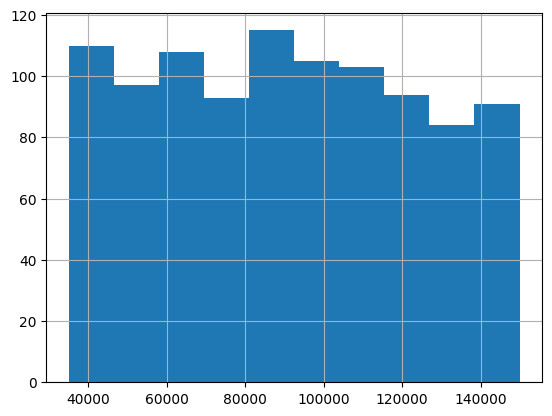

In [7]:
#distributia salariilor acestor angajati pe categorii de salar
employees['Salary'].hist()

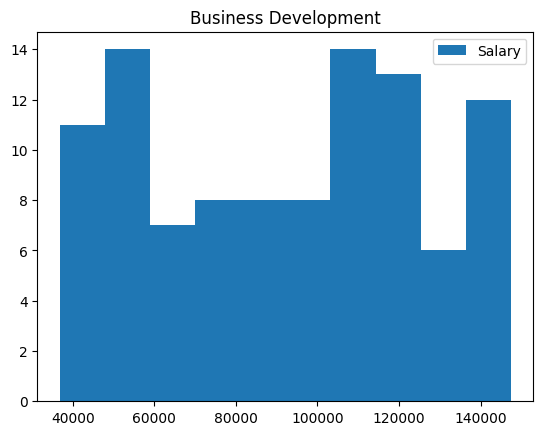

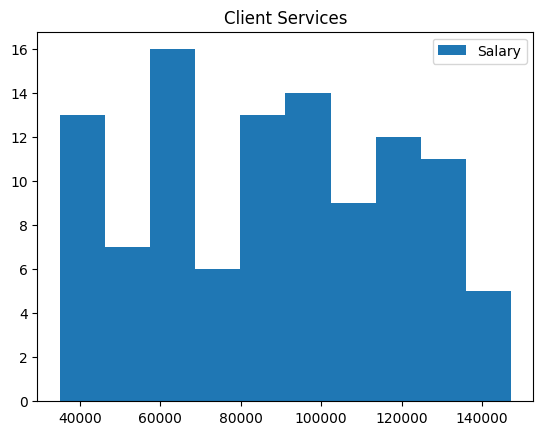

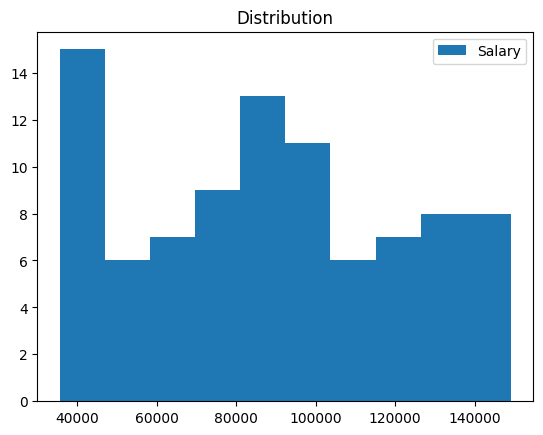

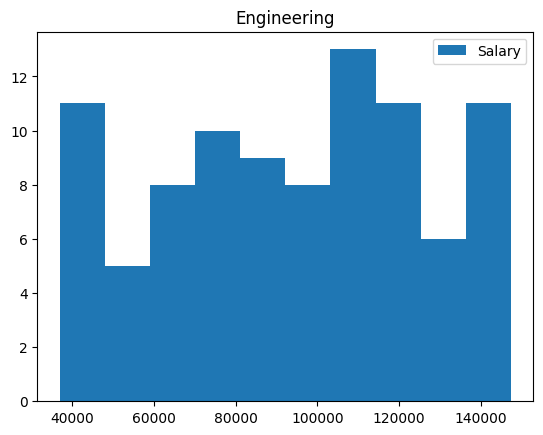

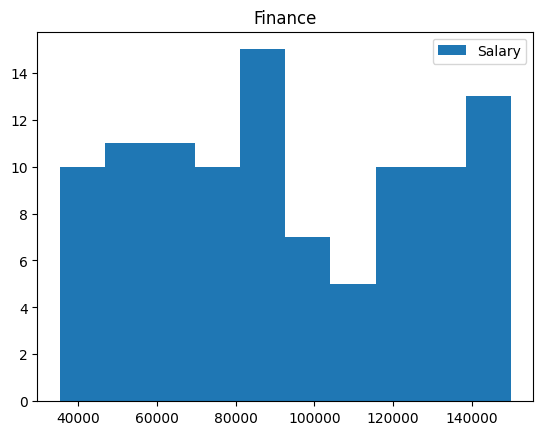

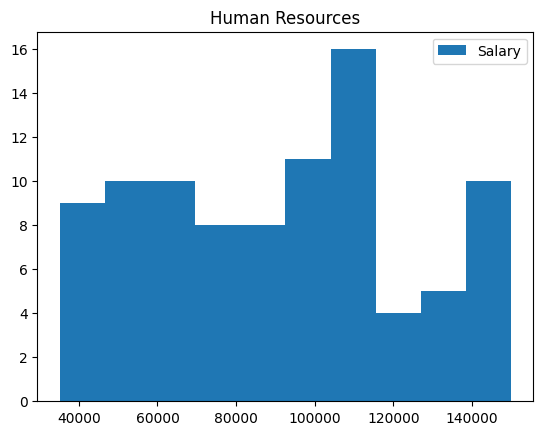

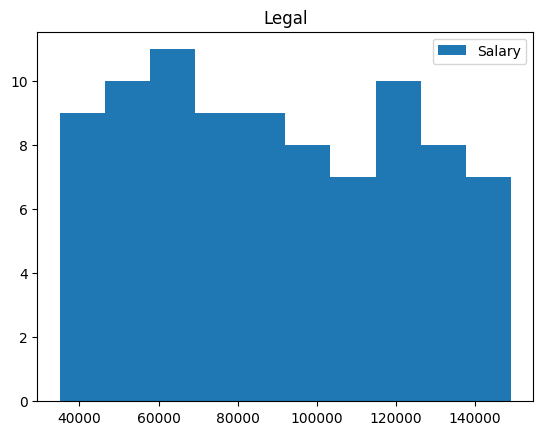

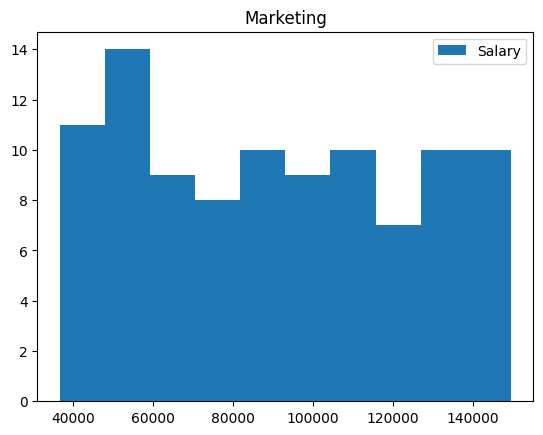

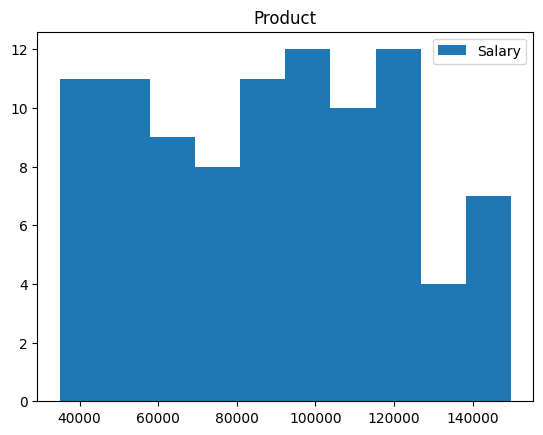

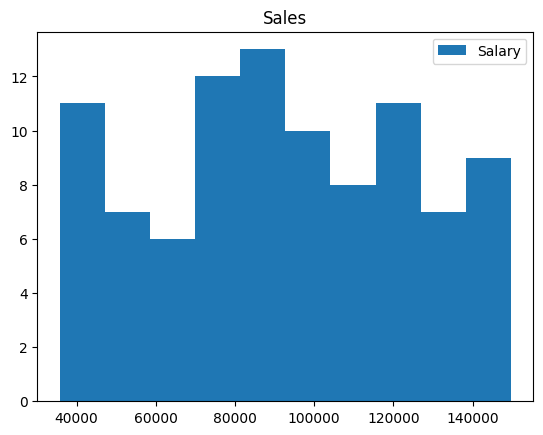

In [8]:
#distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte
for title, group in employees.groupby('Team'):
    plt.hist(group["Salary"],label="Salary")
    plt.legend(loc="upper right")
    plt.title(title)
    plt.show()

<Axes: xlabel='First Name'>

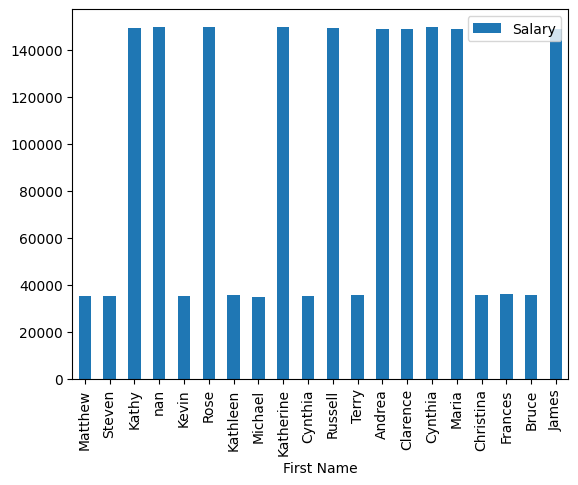

In [9]:
#angajatii care pot fi considerati "outlieri"
lower_end = employees.Salary.quantile(0.01)
higher_end = employees.Salary.quantile(0.99)
employees[~employees.Salary.between(lower_end,higher_end)].plot.bar(y="Salary",x="First Name")
#boxplot